In [1]:
# IMPORTING REQUIRED LIBRARIES FOR DATA ANALYSIS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # Load the technology layoffs dataset
df = pd.read_csv('tech_layoffs.csv')
df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12-09-2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,01-04-2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,08-01-2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


# Basic exploration of the dataset to understand structure and content

In [3]:
df.shape

(489, 9)

In [4]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12-09-2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [5]:
df.tail()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
484,Salesforce,9090,Unclear,01-04-2023,"enterprise tech, analytics",San Francisco,New York Times,Public,NaN
485,Oracle,Unclear,Unclear,08-01-2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN
488,Blueboard,Unclear,Unclear,11-03-2022,Enterprise Software,San Francisco,LinkedIn reports,Private,NaN


In [6]:
df.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'sources',
       'status', 'additional_notes'],
      dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        489 non-null    object
 1   total_layoffs                  489 non-null    object
 2   impacted_workforce_percentage  489 non-null    object
 3   reported_date                  489 non-null    object
 4   industry                       489 non-null    object
 5   headquarter_location           489 non-null    object
 6   sources                        489 non-null    object
 7   status                         489 non-null    object
 8   additional_notes               22 non-null     object
dtypes: object(9)
memory usage: 34.5+ KB


In [9]:
df.describe

<bound method NDFrame.describe of             company total_layoffs impacted_workforce_percentage reported_date  \
0              C2FO            20                             2    12-09-2022   
1          VideoAmp       Unclear                             2     9/19/2022   
2          Amperity            13                             3     8/20/2022   
3           Addepar            20                             3     1/18/2023   
4    Thirty Madison            24                             3     5/13/2022   
..              ...           ...                           ...           ...   
484      Salesforce          9090                       Unclear    01-04-2023   
485          Oracle       Unclear                       Unclear    08-01-2022   
486      LivePerson       Unclear                       Unclear     9/15/2022   
487          Skillz       Unclear                       Unclear     8/29/2022   
488       Blueboard       Unclear                       Unclear    11-03-20

In [10]:
df.isnull().sum()


company                            0
total_layoffs                      0
impacted_workforce_percentage      0
reported_date                      0
industry                           0
headquarter_location               0
sources                            0
status                             0
additional_notes                 467
dtype: int64

In [11]:
raw_df = df.copy()      # preserve original for safety and reference
eda_df = df.drop(columns=['sources', 'additional_notes'])  # Remove columns that are not required for analysis

In [ ]:
#“The sources column was removed because it serves as reference information and does not contribute to exploratory or statistical analysis.”

In [12]:
eda_df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status
0,C2FO,20,2,12-09-2022,"Fintech, payments","Leawood, KS",Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Private


In [13]:
print(eda_df.isnull().sum()) #CHECKING WHETHERE MISSING PRESENT
print("The total number of columns and rows after dropped:",eda_df.shape) # CHECKING  WHAT IS THE SIZE OF DATSET AFETR CLEANING

company                          0
total_layoffs                    0
impacted_workforce_percentage    0
reported_date                    0
industry                         0
headquarter_location             0
status                           0
dtype: int64
The total number of columns and rows after dropped: (489, 7)


In [14]:
# CHECKING FOR DUPLICATES
eda_df.duplicated().sum() 

np.int64(0)

In [15]:
 # Convert reported_date to datetime format for time-based analysis
eda_df['reported_date'] = pd.to_datetime(
    eda_df['reported_date'],format = 'mixed',
    errors='coerce'
)
eda_df


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private
1,VideoAmp,Unclear,2,2022-09-19,Advertising platforms,Los Angeles,Private
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private
...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,2023-01-04,"enterprise tech, analytics",San Francisco,Public
485,Oracle,Unclear,Unclear,2022-08-01,"SaaS, enterprise software",Austin,Public
486,LivePerson,Unclear,Unclear,2022-09-15,Customer service,New York,Public
487,Skillz,Unclear,Unclear,2022-08-29,"Mobile Apps, Gaming",San Francisco,Public


In [ ]:
# CHECKING THE DATA TYPE AFTER CONVERSION

In [16]:
eda_df['reported_date'].dtype

dtype('<M8[ns]')

In [17]:
eda_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    object        
 1   total_layoffs                  489 non-null    object        
 2   impacted_workforce_percentage  489 non-null    object        
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    object        
 5   headquarter_location           489 non-null    object        
 6   status                         489 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 26.9+ KB


In [18]:
# Extract year, month, day and month name from reported_date
eda_df['Year'] = eda_df['reported_date'].dt.year
eda_df['Month'] = eda_df['reported_date'].dt.month
eda_df['Day'] = eda_df['reported_date'].dt.day
eda_df['month_name'] = eda_df['reported_date'].dt.month_name()


In [19]:
eda_df

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,Year,Month,Day,month_name
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,2022,12,9,December
1,VideoAmp,Unclear,2,2022-09-19,Advertising platforms,Los Angeles,Private,2022,9,19,September
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,2022,8,20,August
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,2023,1,18,January
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,2022,5,13,May
...,...,...,...,...,...,...,...,...,...,...,...
484,Salesforce,9090,Unclear,2023-01-04,"enterprise tech, analytics",San Francisco,Public,2023,1,4,January
485,Oracle,Unclear,Unclear,2022-08-01,"SaaS, enterprise software",Austin,Public,2022,8,1,August
486,LivePerson,Unclear,Unclear,2022-09-15,Customer service,New York,Public,2022,9,15,September
487,Skillz,Unclear,Unclear,2022-08-29,"Mobile Apps, Gaming",San Francisco,Public,2022,8,29,August


In [20]:
eda_df['total_layoffs'].dtype


dtype('O')

In [21]:
# Convert total layoffs column to numeric,because the data type is object
eda_df['total_layoffs_numeric'] = pd.to_numeric(
    eda_df['total_layoffs'],
    errors='coerce'
)


In [22]:
#If a value cannot be converted to a number, replace it with NaN (NULL).
#This function tries to convert values into numbers (int/float)
#Example:

"20" → 20

"150" → 150

"unclear" → ❌ not a number
#2️⃣ eda_df['total_layoffs']

This is the original column

Data type = object (mixed numbers + text)
Saves the converted result into a new column

Original column is unchanged

SyntaxError: invalid character '→' (U+2192) (3617682524.py, line 5)

In [23]:
# Handle missing numeric values
# Remove rows with missing or invalid layoffs values
eda_df = eda_df.dropna(subset=['total_layoffs_numeric'])


In [25]:
#What this line means (simple words)

# 👉 Remove rows where total_layoffs_numeric is NULL (NaN)
#👉 Keep only rows with valid numeric layoff values

In [26]:
eda_df[['total_layoffs', 'total_layoffs_numeric']] #extracting required columns

,total_layoffs,total_layoffs_numeric
0,20,20.0
2,13,13.0
3,20,20.0
4,24,24.0
6,25,25.0
...,...,...
480,69,69.0
481,72,72.0
482,825,825.0
483,870,870.0


In [27]:
eda_df.shape

(307, 12)

In [28]:
eda_df['impacted_workforce_percentage'].dtype

dtype('O')

In [29]:
eda_df = eda_df.copy()   #Force Pandas to treat it as a full copy:
# Convert impacted workforce percentage to numeric format
eda_df['workforce_percentage_numeric'] = pd.to_numeric(
    eda_df['impacted_workforce_percentage'],
    errors='coerce'
)

In [30]:
# Remove rows with missing workforce percentage values
eda_df = eda_df.dropna(subset=['workforce_percentage_numeric'])

In [31]:
eda_df[['impacted_workforce_percentage', 'workforce_percentage_numeric']]

,impacted_workforce_percentage,workforce_percentage_numeric
0,2,2.0
2,3,3.0
3,3,3.0
4,3,3.0
6,4,4.0
...,...,...
458,37,37.0
459,39,39.0
460,40,40.0
461,43,43.0


In [53]:
eda_df.head(10)


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,Year,Month,Day,month_name,total_layoffs_numeric,workforce_percentage_numeric
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,2022,12,9,December,20.0,2.0
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,2022,8,20,August,13.0,3.0
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,2023,1,18,January,20.0,3.0
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,2022,5,13,May,24.0,3.0
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private,2022,12,8,December,25.0,4.0
7,Foxtrot,26,4,2022-09-23,"food and beverage, e-commerce",Chicago,Private,2022,9,23,September,26.0,4.0
8,Headspace Health,50,4,2022-12-14,"telehealth, wellness",Los Angeles,Private,2022,12,14,December,50.0,4.0
9,RealSelf,11,5,2022-07-21,Beauty tech,Seattle,Private,2022,7,21,July,11.0,5.0
10,New Relic,110,5,2022-08-18,"productivity, enterprise software","Bay Area, CA",Private,2022,8,18,August,110.0,5.0
11,Abra,12,5,2022-06-30,Crypto,Mountain View,Private,2022,6,30,June,12.0,5.0


In [54]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 463
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        240 non-null    object        
 1   total_layoffs                  240 non-null    object        
 2   impacted_workforce_percentage  240 non-null    object        
 3   reported_date                  240 non-null    datetime64[ns]
 4   industry                       240 non-null    object        
 5   headquarter_location           240 non-null    object        
 6   status                         240 non-null    object        
 7   Year                           240 non-null    int32         
 8   Month                          240 non-null    int32         
 9   Day                            240 non-null    int32         
 10  month_name                     240 non-null    object        
 11  total_layoffs_numeric   

In [33]:
# Calculate total layoffs for each company
company_layoffs = ( eda_df.groupby('company')['total_layoffs_numeric'].sum().sort_values(ascending=False))
company_layoffs

company
Amazon                    18000.0
Meta                      11000.0
Better.com                 5000.0
Cisco                      4100.0
Twitter                    3740.0
                           ...   
Abra                         12.0
RealSelf                     11.0
Digital Currency Group       10.0
Sourcepoint                   7.0
Woven                         5.0
Name: total_layoffs_numeric, Length: 238, dtype: float64

In [34]:
company_layoffs_df = pd.DataFrame(company_layoffs)
company_layoffs_df

,total_layoffs_numeric
company,
Amazon,18000.0
Meta,11000.0
Better.com,5000.0
Cisco,4100.0
Twitter,3740.0
...,...
Abra,12.0
RealSelf,11.0
Digital Currency Group,10.0


In [35]:
 # Analyze total layoffs across different industries
industry_layoffs = (
    eda_df
    .groupby('industry')['total_layoffs_numeric']
    .sum()
    .sort_values(ascending=False)
)
pd.DataFrame(industry_layoffs)

,total_layoffs_numeric
industry,
"E-commerce, SaaS",18000.0
Social media,12420.0
Fintech,8686.0
"enterprise software, SaaS",4100.0
Social Media,3765.0
...,...
"Media, Content Creators",13.0
"Saas, analytics",13.0
Beauty tech,11.0


In [36]:
#  Analyze layoffs based on company headquarters location
location_layoffs = eda_df.groupby('headquarter_location')['total_layoffs_numeric'] .sum().sort_values(ascending=False)
pd.DataFrame(location_layoffs)

,total_layoffs_numeric
headquarter_location,
Seattle,20314.0
San Francisco,18766.0
"Menlo Park, CA",11000.0
New York,9259.0
"San Jose, CA",4355.0
...,...
"Bellevue, WA",32.0
"Leawood, KS",20.0
"Lehi, UT",20.0


In [38]:
# Analyze layoffs trend across years (2022–2023 focus)
pd.DataFrame(eda_df.groupby('Year')['total_layoffs_numeric'].sum())


,total_layoffs_numeric
Year,
2022,54468.0
2023,30341.0


In [39]:
eda_df['total_layoffs_numeric'].dtype

dtype('float64')

In [40]:
eda_df['workforce_percentage_numeric'].dtype

dtype('float64')

In [41]:
eda_df.columns

Index(['company', 'total_layoffs', 'impacted_workforce_percentage',
       'reported_date', 'industry', 'headquarter_location', 'status', 'Year',
       'Month', 'Day', 'month_name', 'total_layoffs_numeric',
       'workforce_percentage_numeric'],
      dtype='object')

In [42]:
# IMPORTING LIBRARIES FOR VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

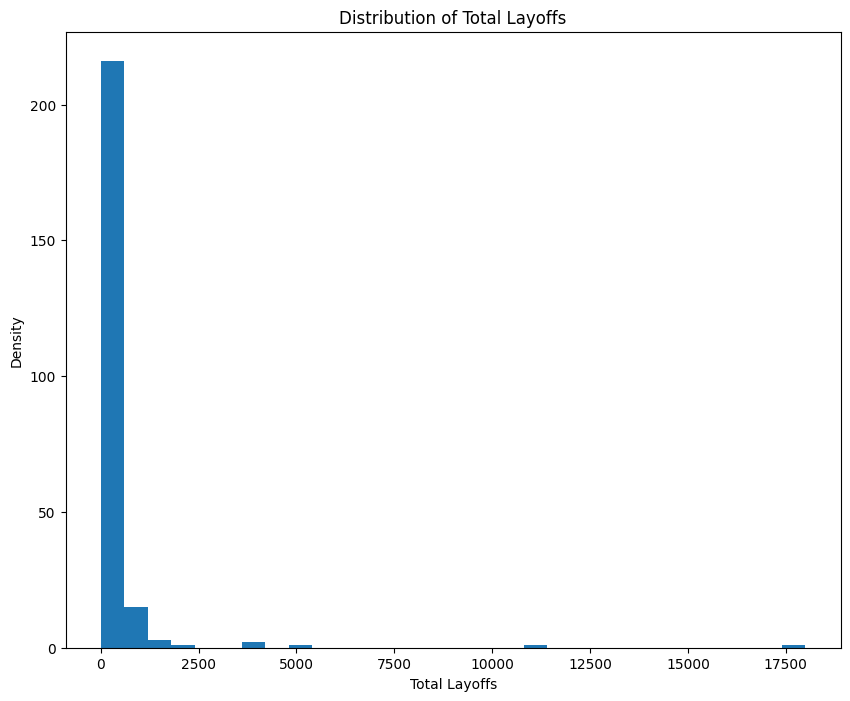

In [43]:
#Distribution of total layoffs
plt.figure(figsize=(10,8))
plt.hist(eda_df['total_layoffs_numeric'], bins=30)
plt.title("Distribution of Total Layoffs")
plt.xlabel("Total Layoffs")
plt.ylabel("Density")
plt.show()


### Most companies have 0 layoffs → very high density near 0

### Very few companies have large layoffs (close to 7000) → low density on the right

### This creates a long tail towards higher values

### Therefore,it is right skewed(Positively Skewed)

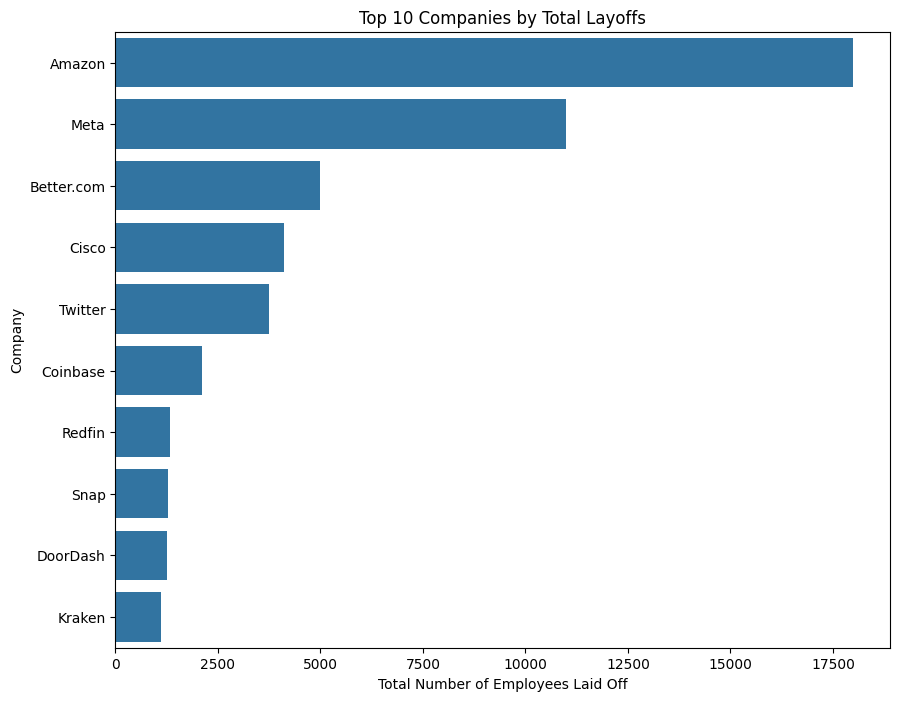

In [44]:
#Company-wise total layoffs
top_companies = (company_layoffs.head(10))

plt.figure(figsize=(10,8))
sns.barplot(
    x=top_companies.values,
    y=top_companies.index
)
plt.title("Top 10 Companies by Total Layoffs")
plt.xlabel("Total Number of Employees Laid Off")
plt.ylabel("Company")
plt.show()


# Amazon appears to be the company which has large layoffs in year 2022-2023 as per analysis follwed by Meta

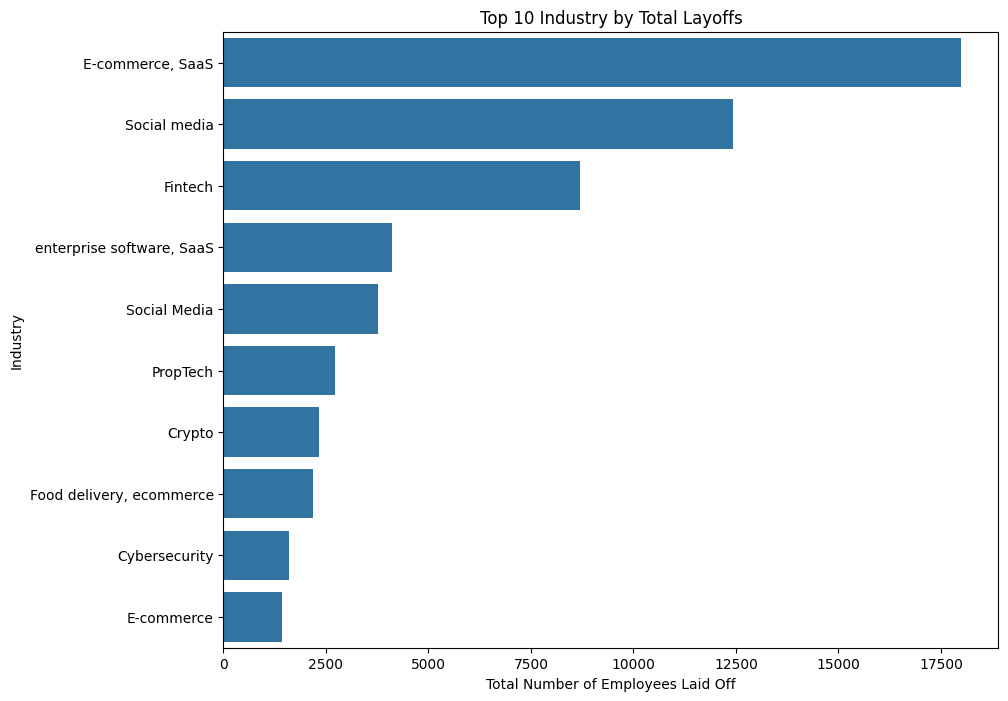

In [45]:
# Industry-wise total layoffs
top_industries = industry_layoffs.head(10)
plt.figure(figsize=(10,8))
sns.barplot(
    x=top_industries.values,
    y=top_industries.index
)
plt.title("Top 10 Industry by Total Layoffs")
plt.xlabel("Total Number of Employees Laid Off")
plt.ylabel("Industry")
plt.show()


# E-comerce were the sector experienced high layoffs in year 2022-2023 followed by Social Media

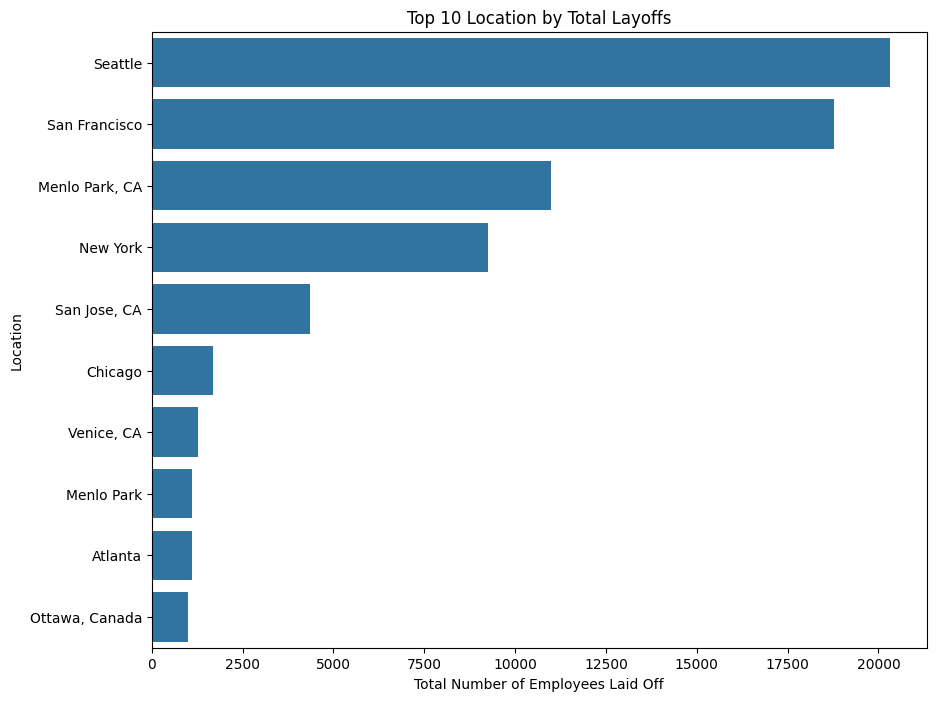

In [46]:
# Location-wise total layoffs
top_locations = location_layoffs.head(10)
plt.figure(figsize=(10,8))
sns.barplot(
    x=top_locations.values,
    y=top_locations.index
)
plt.title("Top 10 Location by Total Layoffs")
plt.xlabel("Total Number of Employees Laid Off")
plt.ylabel("Location")
plt.show()


# Seattle and San Francisco were the areas  where major  layoffs happened in year 2022-2023

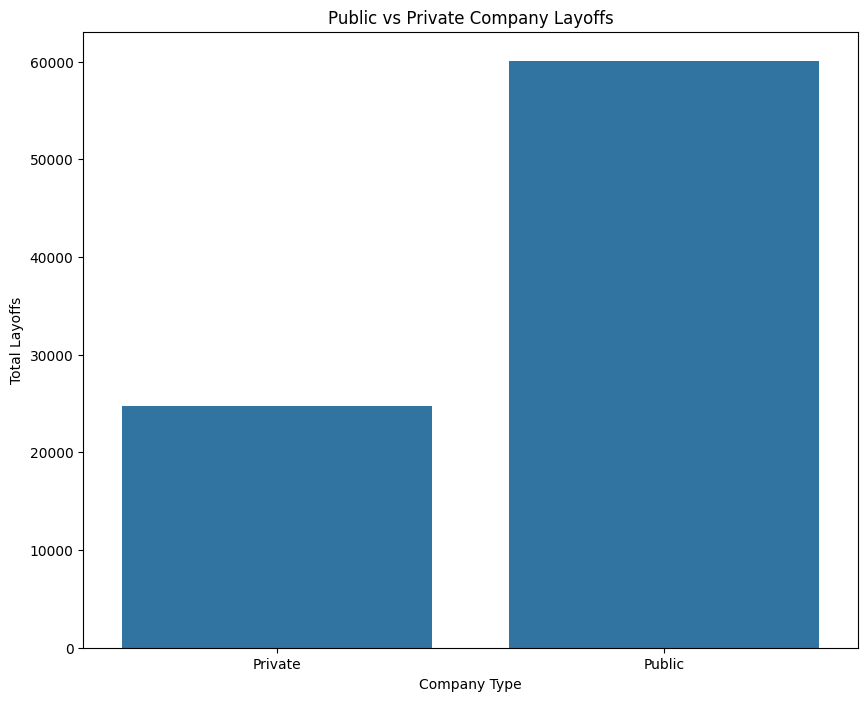

In [47]:
# Public vs Private
ownership_layoffs = (
    eda_df.groupby('status')['total_layoffs_numeric']
    .sum()
)

plt.figure(figsize=(10,8))
sns.barplot(
    x=ownership_layoffs.index,
    y=ownership_layoffs.values
)
plt.title("Public vs Private Company Layoffs")
plt.xlabel("Company Type")
plt.ylabel("Total Layoffs")
plt.show()


# Public Companies have more layoffs than compared to private companies in year 2022-2023

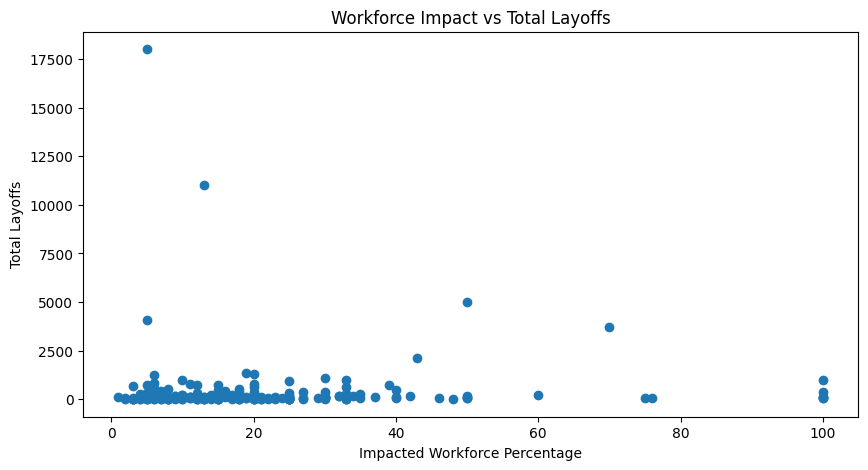

In [48]:
# Impacted workforce % vs total layoffs
plt.figure(figsize=(10,5))
plt.scatter(
    eda_df['workforce_percentage_numeric'],
    eda_df['total_layoffs_numeric']
)
plt.title("Workforce Impact vs Total Layoffs")
plt.xlabel("Impacted Workforce Percentage")
plt.ylabel("Total Layoffs")
plt.show()


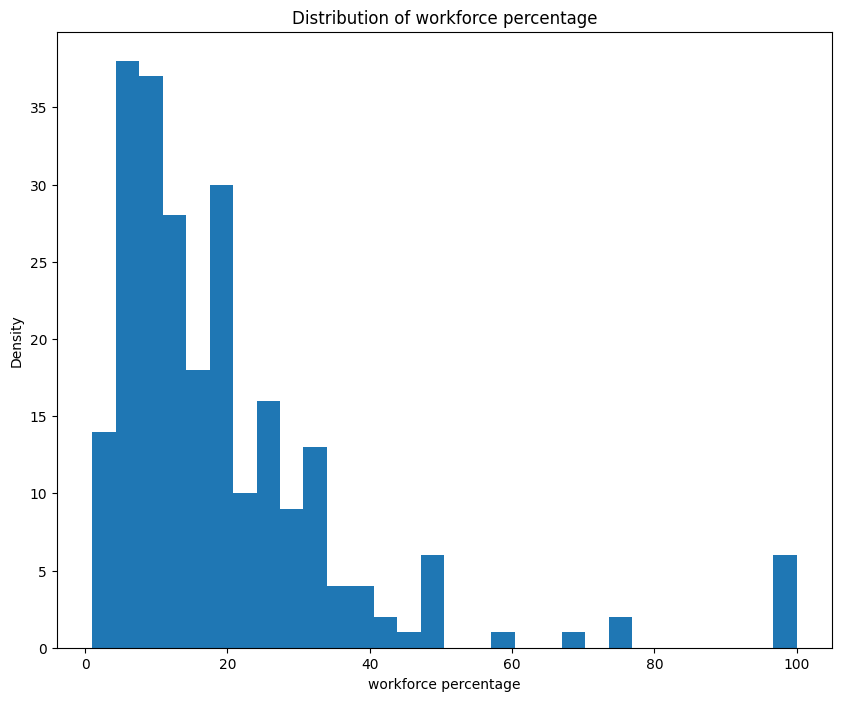

In [51]:
# Distribution of workforce percentage
plt.figure(figsize=(10,8))
plt.hist(eda_df['workforce_percentage_numeric'], bins=30)
plt.title("Distribution of workforce percentage")
plt.xlabel("workforce percentage")
plt.ylabel("Density")
plt.show()

## The histogram above shows that ,most companies had a low workforce impact.(~~20%).

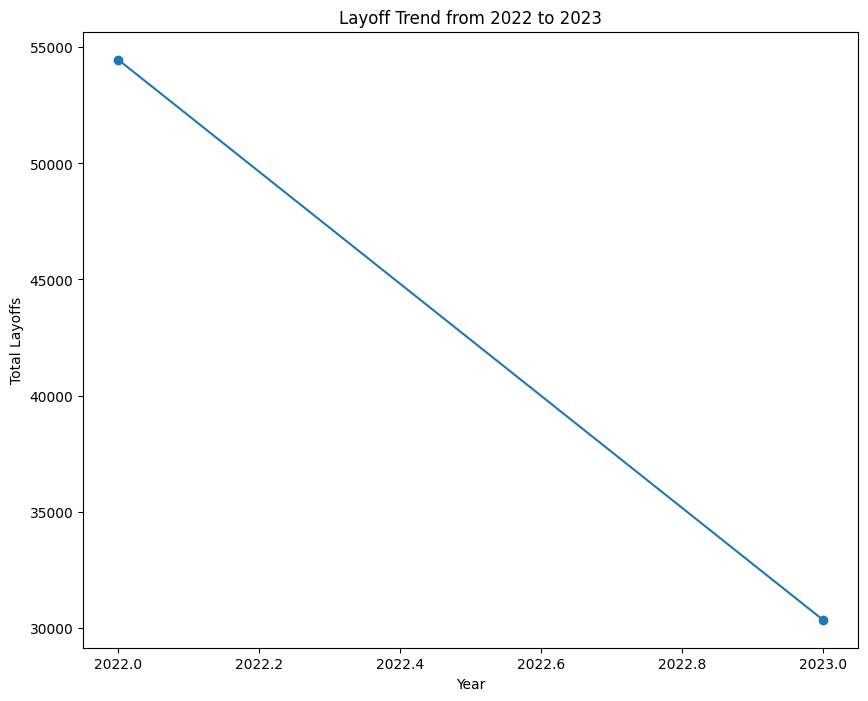

In [50]:
# Layoff trend from 2022 to 2023
yearly_layoffs = (
    eda_df.groupby('Year')['total_layoffs_numeric']
    .sum()
)

plt.figure(figsize=(10,8))
plt.plot(
    yearly_layoffs.index,
    yearly_layoffs.values,
    marker='o'
)
plt.title("Layoff Trend from 2022 to 2023")
plt.xlabel("Year")
plt.ylabel("Total Layoffs")
plt.show()


# The trend shows a decline in layoffs from year 2022 to 2023.

In [72]:
# Save the cleaned and preprocessed dataset to an Excel file
# This file is used for interactive visualization and dashboard creation in Tableau
eda_df.to_excel(
    "tech_layoffs_cleaned.xlsx",
    index=False,
    engine="openpyxl"
)

In [ ]:
eda_df

This is your pandas DataFrame containing the cleaned dataset (eda_df is usually the DataFrame you prepared after preprocessing).

.to_excel()

This is a pandas function used to save a DataFrame to an Excel file (.xlsx or .xls).

"tech_layoffs_cleaned.xlsx"

The filename you want to save your DataFrame as.

This will create a file named tech_layoffs_cleaned.xlsx in your current working directory.

index=False

This tells pandas not to write the row index (0,1,2,…) to the Excel file.

If you set index=True, the Excel sheet would have an extra column for the row numbers.

engine="openpyxl"

Pandas can use different engines to write Excel files.

openpyxl is one of the popular engines for .xlsx files.

You must have the openpyxl library installed (pip install openpyxl) for this to work.

✅ In simple words: This code saves your cleaned DataFrame eda_df as an Excel file called tech_layoffs_cleaned.xlsx without the row numbers, using the openpyxl engine.

In [73]:
df1=pd.read_excel("tech_layoffs_cleaned.xlsx")
df1

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,status,Year,Month,Day,month_name,total_layoffs_numeric,workforce_percentage_numeric
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Private,2022,12,9,December,20,2
1,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Private,2022,8,20,August,13,3
2,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Private,2023,1,18,January,20,3
3,Thirty Madison,24,3,2022-05-13,Health Care,New York,Private,2022,5,13,May,24,3
4,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Private,2022,12,8,December,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Latch,115,37,2022-08-02,PropTech,"New York, NY",Public,2022,8,2,August,115,37
236,Sema4,750,39,2022-11-14,"AI, health care","Stamford, CT",Public,2022,11,14,November,750,39
237,Root Insurance,467,40,2022-11-09,InsurTech,Columbus,Public,2022,11,9,November,467,40
238,Coinbase,2110,43,2023-01-10,Crypto,San Francisco,Public,2023,1,10,January,2110,43
